### Data loading

In [1]:
import pandas as pd

In [2]:
penguins = pd.read_csv("data/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

### Model definition

In [3]:
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass
):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

## Main exercise

In [4]:
import numpy as np

In [5]:
flipper_length_range = np.linspace(data.min(), data.max(), num=300)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

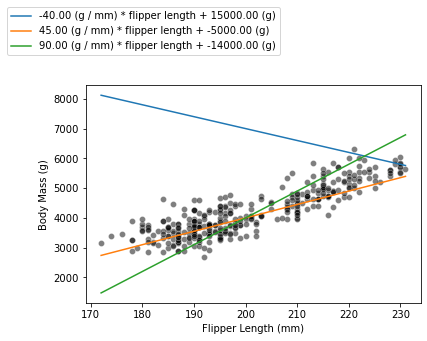

In [7]:
weights = [-40, 45, 90]
intercepts = [15000, -5000, -14000]

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"
for weight, intercept in zip(weights, intercepts):
    predicted_body_mass = linear_model_flipper_mass(
        flipper_length_range, weight, intercept)
    
    ax.plot(flipper_length_range, predicted_body_mass,
            label=label.format(weight, intercept))
_ = ax.legend(loc='center left', bbox_to_anchor=(-0.25, 1.25), ncol=1)

In the previous question, you were asked to create several linear models. The visualization allowed you to qualitatively assess if a model was better than another.

Now, you should come up with a quantitative measure which will indicate the goodness of fit of each linear model. This quantitative metric should result in a single scalar and allow you to pick up the best model.

In [8]:
def goodness_fit_measure(true_values, predictions):
    # we compute the error between the true values and the predictions of our
    # model
    errors = np.ravel(true_values) - np.ravel(predictions)
    # We have several possible strategy to reduce all errors to a single value.
    # Computing the mean error (sum divided by the number of element) looks
    # like a good solution. However, we have negative error and therefore, we
    # need to sum only positive numbers. Therefore, we can either square each
    # error or take the absolute value: these metrics are known as mean
    # squared error (MSE) and mean absolute error (MAE). Let's use the MAE here
    # as an example.
    return np.mean(np.abs(errors))

In [9]:
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")

Model #0:
-40.00 (g / mm) * flipper length + 15000.00 (g)
Error: 2764.854

Model #1:
45.00 (g / mm) * flipper length + -5000.00 (g)
Error: 338.523

Model #2:
90.00 (g / mm) * flipper length + -14000.00 (g)
Error: 573.041

